<a href="https://colab.research.google.com/github/ZichenLiu123/DataScience_Learning/blob/main/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

import pymc as pm
import arviz as az

from gensim import corpora
from gensim.models import LdaModel

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Q1

In [ ]:
# DO NOT MODIFY THIS CODE
website_visits_data = np.loadtxt('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/website_visits.csv', delimiter=',')

## (a)

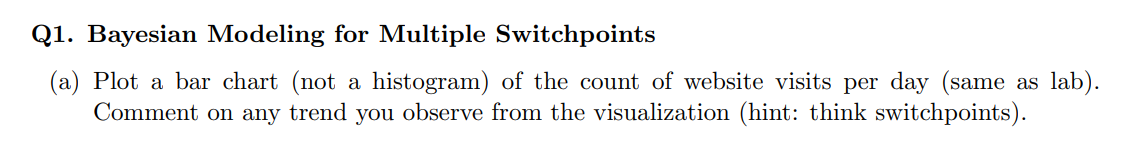

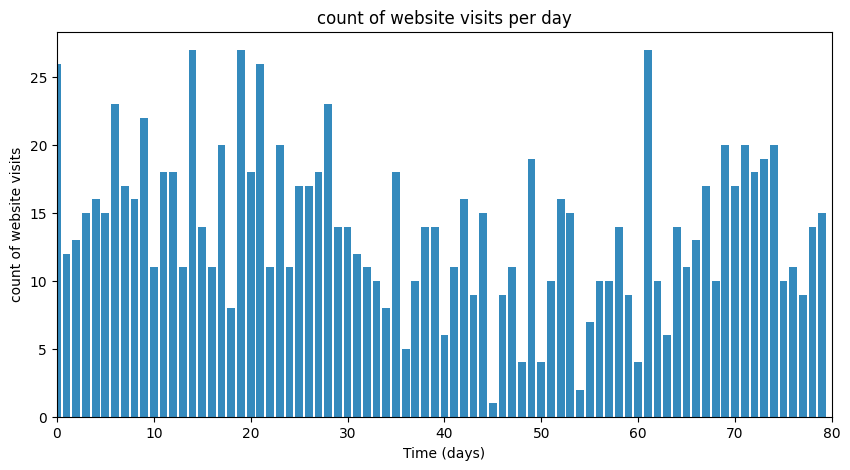

In [ ]:
# YOUR CODE STARTS HERE
n_count_data = len(website_visits_data)
plt.figure(figsize=(10,5))
plt.bar(np.arange(n_count_data), website_visits_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of website visits")
plt.title("count of website visits per day")
plt.xlim(0, n_count_data);

**Enter your answer here:**
There seems to be switch points at around day 35 and 65. Before day 35 and after 65, the counts of website visits seem to be higher than the ones between 35 and 65.

## (b)

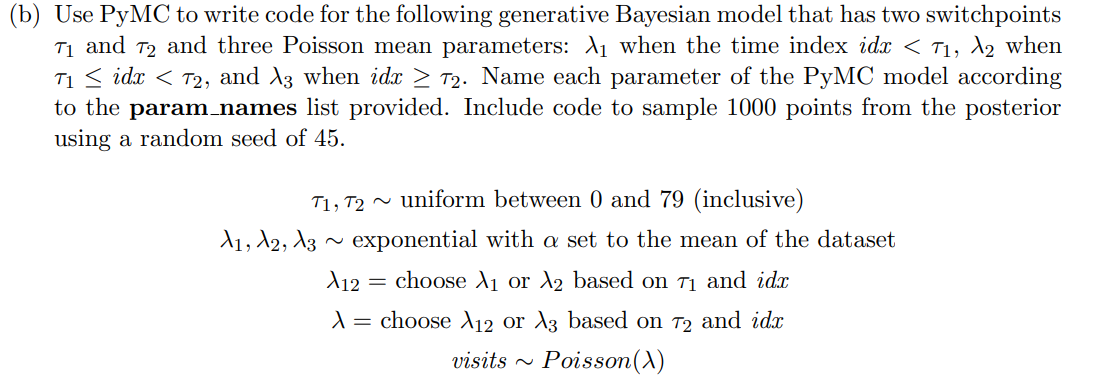

In [ ]:
# DO NOT MODIFY THIS CODE

param_names = ['tau_1', 'tau_2', 'lambda_1', 'lambda_2', 'lambda_3']

double_switchpoint_model = pm.Model()

with double_switchpoint_model:

  # Define priors
  # YOUR CODE STARTS HERE (FILL IN THE BLANKS)
  alpha = 1/np.mean(website_visits_data)
  tau_1 = pm.DiscreteUniform(param_names[0], lower=0, upper=79)
  tau_2 = pm.DiscreteUniform(param_names[1], lower=0, upper=79)
  lambda_1 = pm.Exponential(param_names[2], alpha)
  lambda_2 = pm.Exponential(param_names[3], alpha)
  lambda_3 = pm.Exponential(param_names[4], alpha)
  idx = np.arange(80)
  lambda_12 = pm.math.switch(idx < tau_1, lambda_1, lambda_2)
  lambda_ = pm.math.switch(idx < tau_2, lambda_12, lambda_3)

  # Define likelihood (conditioned on observed data)
  # YOUR CODE STARTS HERE (FILL IN THE BLANK)
  likelihood = pm.Poisson("count", lambda_, observed = website_visits_data)

  # Sample from posterior
  # YOUR CODE STARTS HERE (FILL IN THE BLANK)
  trace = pm.sample(1000, random_seed=45)

## (c)

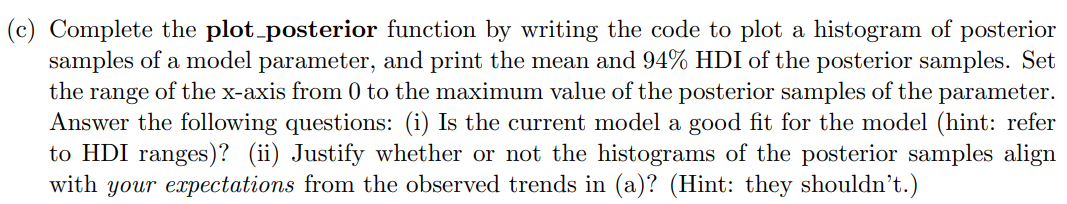

In [ ]:
# Function to: (a) plot histogram of posterior samples (b) display mean and 94% HDI of posterior samples

def plot_posterior(param_name, trace):

    # (a) Plot histogram of posterior samples of passed parameter
    ax = sns.histplot(trace.posterior[param_name].values.flatten())
    ax.set_xlim(0, 80)
    plt.xlabel(param_name)
    plt.ylabel('Number of Samples')
    plt.title(f'Histogram of Posterior Samples of {param_name}')

    # (b) Display mean and 94% HDI of posterior samples of passed parameter (round to 2 decimal places)
    mean_param = np.mean(trace.posterior[param_name].values.flatten())
    hdi_param = az.hdi(trace.posterior[param_name].values.flatten())
    print(f"\nMean of {param_name}: {mean_param}")
    print(f"94% HDI of {param_name}: {hdi_param}")

    plt.show()  # Ensure the plot is displayed


    return None


Mean of tau_1: 50.7435
94% HDI of tau_1: [22 76]


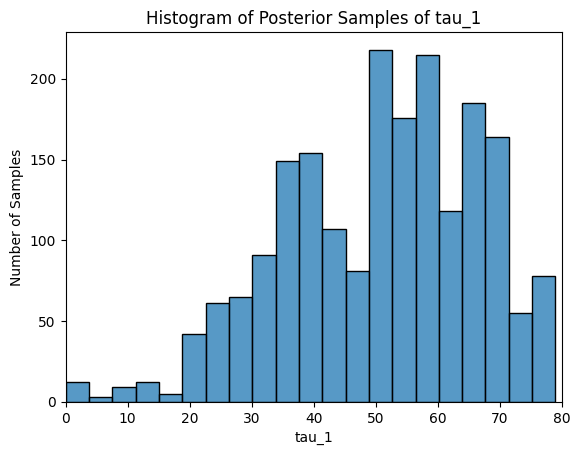


Mean of tau_2: 29.7645
94% HDI of tau_2: [27 33]


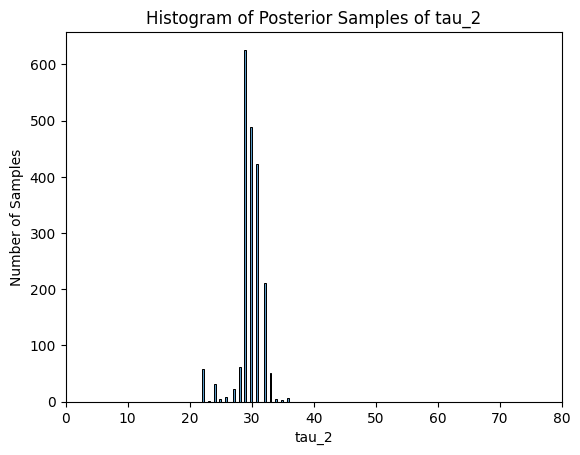


Mean of lambda_1: 17.098343652400036
94% HDI of lambda_1: [15.62738205 18.42165738]


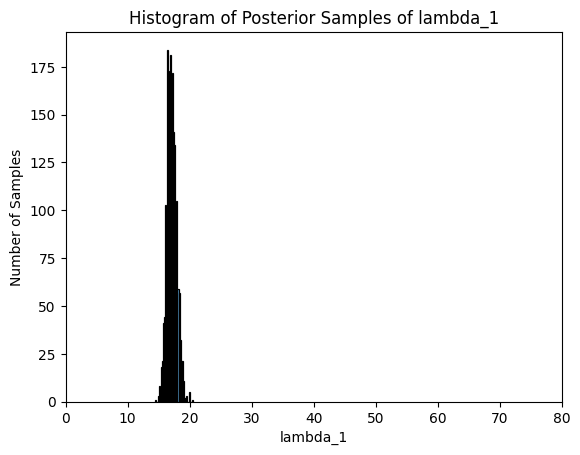


Mean of lambda_2: 13.697108160073366
94% HDI of lambda_2: [1.67208128e-03 3.70375633e+01]


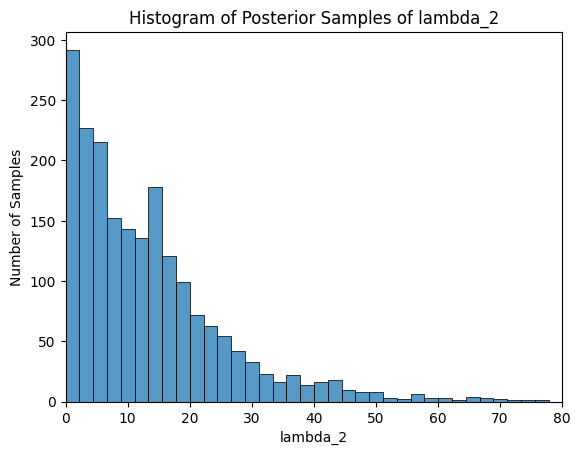


Mean of lambda_3: 12.046920571124968
94% HDI of lambda_3: [11.08642295 12.9141061 ]


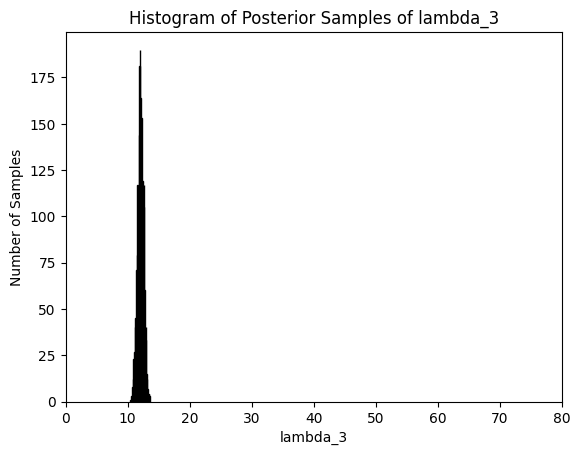

In [ ]:
# DO NOT MODIFY THIS CODE
for param_name in param_names:
    plot_posterior(param_name, trace)
    plt.show()

**Enter answer here:**
(i) The current model is not a good fit. The 94% HDI of tau_1 is 22 to 76, which is very large. Additionally, the 94% HDI of lambda_2 1.67208128e-03 to 3.70375633e+01 is also very large. (ii) The historgrams do not align with my expectations. We expect the mean of lambda 1 and lambda 3 to be alot larger than lambda 2 since that was the trend observed in the earlier bar plot. However, the histograms revealed that the mean of lambda 2 is larger than lambda 3 which is not our expected outcome. Tau 2 could also be before tau 1 based on the HDI range, which should not occur.



## (d)

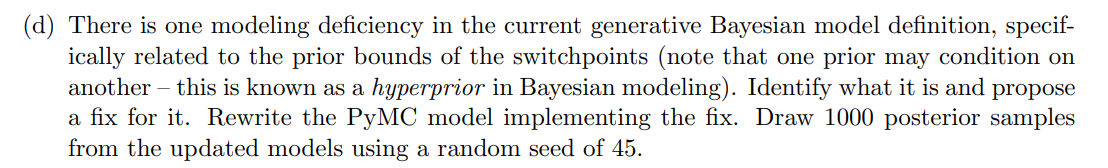

In [ ]:
# DO NOT MODIFY THIS CODE

double_switchpoint_model_adjusted = pm.Model()

with double_switchpoint_model_adjusted:

  # Define priors
  # YOUR CODE STARTS HERE (FILL IN THE BLANKS)
  alpha = 1/np.mean(website_visits_data)
  tau_1 = pm.DiscreteUniform(param_names[0], lower=0, upper=79)
  tau_2 = pm.DiscreteUniform(param_names[1], lower=tau_1 + 1, upper=79)
  lambda_1 = pm.Exponential(param_names[2], alpha)
  lambda_2 = pm.Exponential(param_names[3], alpha)
  lambda_3 = pm.Exponential(param_names[4], alpha)
  idx = np.arange(80)
  lambda_12 = pm.math.switch(idx < tau_1, lambda_1, lambda_2)
  lambda_ = pm.math.switch(idx < tau_2, lambda_12, lambda_3)

  # Define likelihood (conditioned on observed data)
  # YOUR CODE STARTS HERE (FILL IN THE BLANK)
  likelihood = pm.Poisson("count", lambda_, observed = website_visits_data)

  # Sample from posterior
  # YOUR CODE STARTS HERE (FILL IN THE BLANK)
  trace_adjusted = pm.sample(1000, random_seed=45)


**Enter your answer here:**
Before the change it meant that tau_2 could occur before tau_1, which is not true. Since we expect one switchpoint to precede the other in time (1 precedes 2). Thus, I changed the lowered bound of tau_2 so that it is at least one time point more than the tau_1 (occurs after).

## (e)

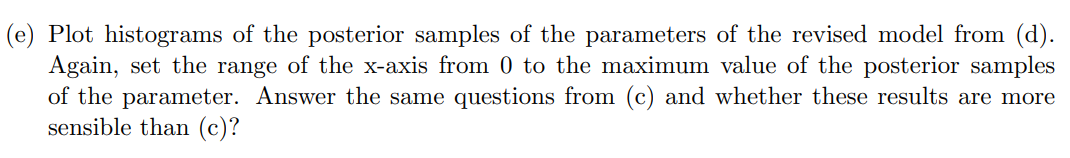


Mean of tau_1: 30.687
94% HDI of tau_1: [29 33]


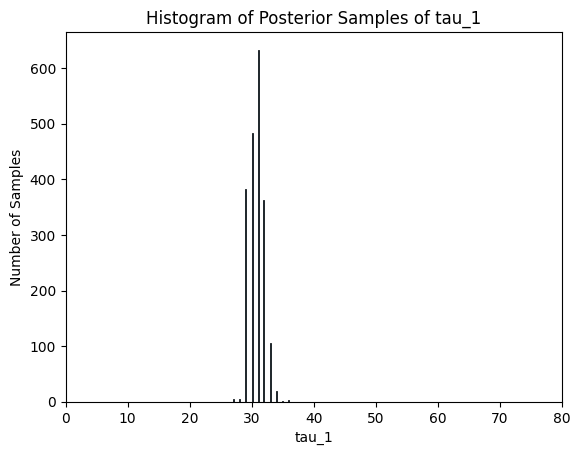


Mean of tau_2: 63.0095
94% HDI of tau_2: [60 68]


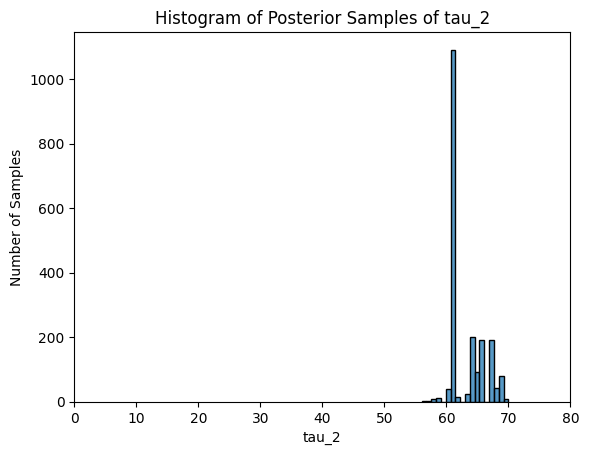


Mean of lambda_1: 17.06385218204822
94% HDI of lambda_1: [15.69480867 18.4503709 ]


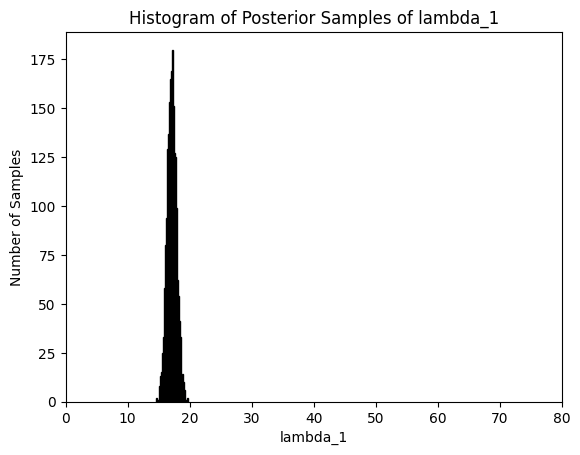


Mean of lambda_2: 10.43225281058766
94% HDI of lambda_2: [ 9.28130353 11.53951208]


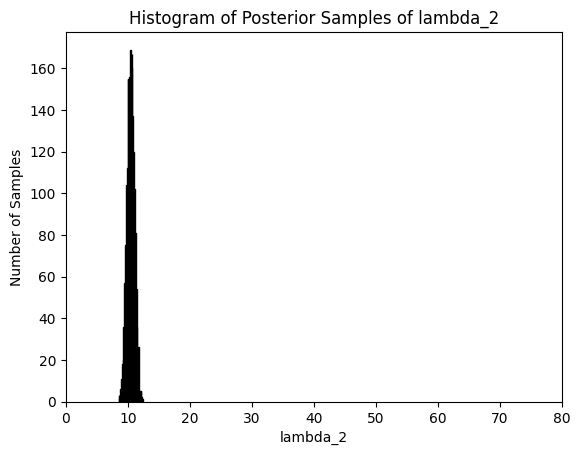


Mean of lambda_3: 14.923615504079933
94% HDI of lambda_3: [13.08789866 16.68663448]


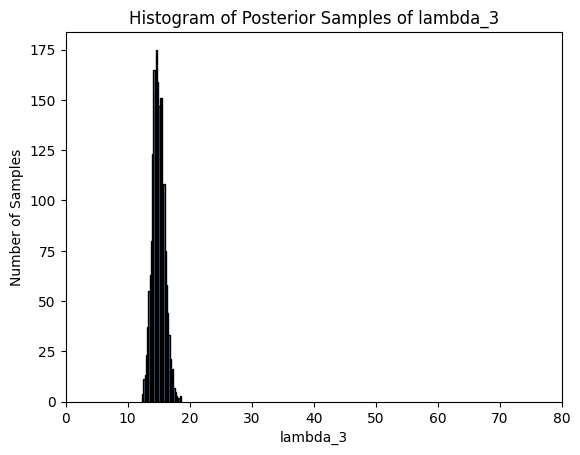

In [ ]:
# YOUR CODE GOES HERE
for param_name in param_names:
    plot_posterior(param_name, trace_adjusted)
    plt.show()

**Enter answer here:**
The results are more sensible than (c). (i) The model seems to be a good fit, since the HDI ranges are relatively narrow and reasonable. (ii) The histograms now align with my expectations since the mean of lambda_2 is no longer larger than lambda_3. The histograms correctly capture the overall trend.

# Q2

In [ ]:
topic_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/topic_dataset.csv')
topic_df["preprocessed"] = topic_df["preprocessed"].apply(lambda x: ast.literal_eval(x))
topic_df.head()

,document,preprocessed
0,Hi Xperts!\n\nHow can I move the cursor with t...,"[xperts, cursor, keyboard, cursor, key, mouse,..."
1,Where can I obtain a copy of the Open Look wid...,"[obtain, copy, open, look, widget, obtainable,..."
2,\nYou're right about the signal being strong. ...,"[right, signal, strong, live, west, philadelph..."
3,"\nHe's a Canadian ""thing"". Former coach of the...","[canadian, thing, coach, boston, bruin, colora..."
4,"\n\n Heck, I seem to feel like that *ev...","[heck, feel, like, time, including, cafeteria,..."


## (a)

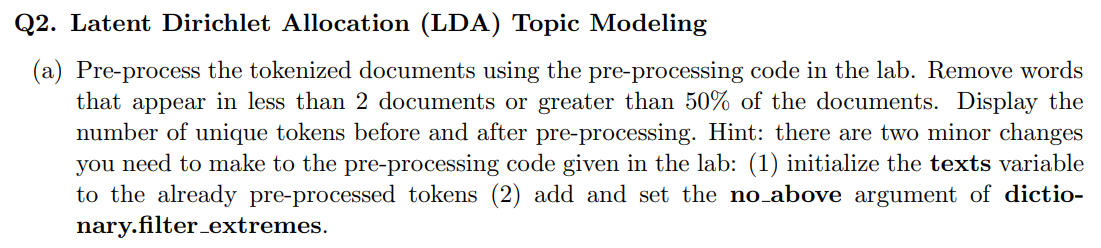

In [ ]:
## YOUR CODE GOES HERE
from gensim import corpora
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Assuming 'topic_df' is your DataFrame and it already contains the preprocessed tokens
texts = topic_df['preprocessed']  # Initialize 'texts' with pre-processed tokens

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

#Remove stop words from a stop words set; merged from nltk and scikit-learn's built-in list and words
stoplist = set(stopwords.words('english')).union(set(ENGLISH_STOP_WORDS))
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist
            if stopword in dictionary.token2id]

dictionary.filter_tokens(stop_ids)

# Number of unique tokens before filtering
unique_tokens_before = len(dictionary)
print(f'Number of unique tokens before filtering: {unique_tokens_before}')

# Filter out tokens that appear in less than 2 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=2, no_above=0.5)

# Number of unique tokens after filtering
dictionary.compactify()
unique_tokens_after = len(dictionary)
print(f'Number of unique tokens after filtering: {unique_tokens_after}')

corpus = [dictionary.doc2bow(text) for text in texts]


Number of unique tokens before filtering: 49312
Number of unique tokens after filtering: 25104


## (b)

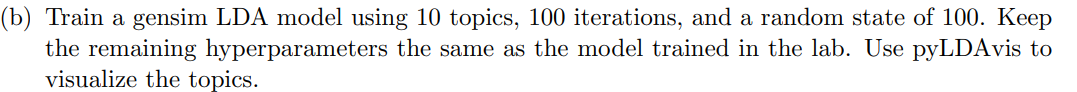

In [ ]:
# Train LDA model

# YOUR CODE GOES HERE
# Training LDA can take some time, set eval_every = None to not evaluate the model perplexity
topic_model = LdaModel(corpus, id2word = dictionary, num_topics = 10, iterations = 100, eval_every = None, random_state = 100, minimum_probability = 0)



In [ ]:
# Display LDA visualization

# YOUR CODE GOES HERE
lda_topic_diagram = pyLDAvis.gensim_models.prepare(topic_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_topic_diagram)
lda_topic_diagram


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.157940 -0.000224       1        1  11.524367
1     -0.031282  0.131222       2        1   3.631323
2     -0.103395  0.098031       3        1   3.668419
3     -0.058367 -0.089745       4        1  14.019759
4     -0.063127 -0.040531       5        1   7.489208
5      0.218932 -0.049154       6        1  12.205720
6     -0.000439  0.125442       7        1  12.587743
7      0.055963 -0.008531       8        1  20.780284
8     -0.134138 -0.116949       9        1   3.078887
9     -0.042088 -0.049562      10        1  11.014289, topic_info=          Term         Freq        Total Category  logprob  loglift
680   armenian  1765.000000  1765.000000  Default  30.0000  30.0000
127       game  2112.000000  2112.000000  Default  29.0000  29.0000
2593    israel   899.000000   899.000000  Default  28.0000  28.0000
89        team  1408.000000  1408.000000  Default  27.0000  27.0000
291     window  1868.000000  1868.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
98        work   243.840425  1691.069126  Topic10  -5.7649   0.2694
76       right   236.103419  2030.270047  Topic10  -5.7972   0.0543
1627      sure   208.255497  1017.279740  Topic10  -5.9227   0.6199
46        good   219.164541  2081.262808  Topic10  -5.8716  -0.0449
13        need   210.361957  1552.768804  Topic10  -5.9126   0.2070

[872 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
2633       8  0.982931      abiding
12172      2  0.945526  accelerated
13374      1  0.074588  accelerator
13374      6  0.909969  accelerator
2123       1  0.059129         adam
...      ...       ...          ...
1131       7  0.233432         zone
1131       8  0.006484         zone
1131       9  0.071327         zone
1131      10  0.038905         zone
14989      9  0.979837         zoom

[3684 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

## (c)

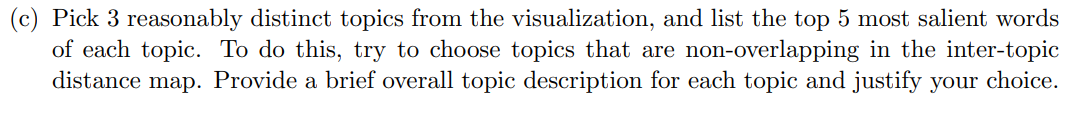

**Enter answer here:**
I choose topic 1 ,6, and 9. For topic 1, the most salient words are: space,
program, launch, like, card. This topic seems to contain content related space operations. For topic 6, the most salient words are: window,
file ,server, program, available. The words suggest that the topic is related to computers. The last topic I chose was topic 9. The most salient words are: israel, arab, people, israeli, right. These words suggest that the topic is related to Israel-Arab relations and conflicts.
